Peakutils works pretty well for peak finding. Found by reading: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/

When comparing with graph in Igor, the function accurately finds the maximum point. 

Do not smooth spectra; this was tested and gave peaks that were off. 

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sps
import peakutils
from peakutils import plot 
%matplotlib inline

In [16]:
spectrum=np.genfromtxt('../Data/PointSpectra/Spectrum1.txt', delimiter="", skip_header=1)

In [85]:
#threshold=minimum peak intensity required to count as a peak
#min_distance=should put experimental wavenumber spacing. 
peakindices = peakutils.indexes(spectrum[:,1], thres=0.10, min_dist=1)

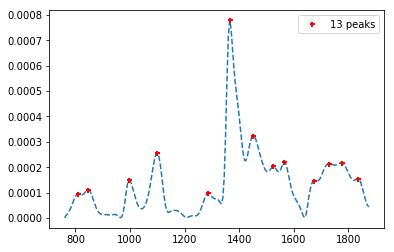

In [86]:
 peakutils.plot.plot(spectrum[:,0],spectrum[:,1], peakindices)

In [46]:
peaksdict={}
for index in indexes:
    peaksdict[spectrum[index][0]] = spectrum[index][1]

In [60]:
peaksdict

{810.0: 9.5670206064824001e-05,
 845.0: 0.00011085541336797199,
 945.0: 1.41178561534616e-05,
 995.0: 0.00014962983550503899,
 1100.0: 0.00025697844102978701,
 1160.0: 3.0258943297667398e-05,
 1230.0: 9.2435238912003098e-06,
 1285.0: 9.8389311460778104e-05,
 1365.0: 0.00077896163566038002,
 1450.0: 0.00032477811328135398,
 1525.0: 0.00020304757345002101,
 1565.0: 0.00022211759642232201,
 1675.0: 0.00014753043069504199,
 1730.0: 0.00021318129438441201,
 1775.0: 0.00021715770708397001,
 1835.0: 0.000154900437337346}

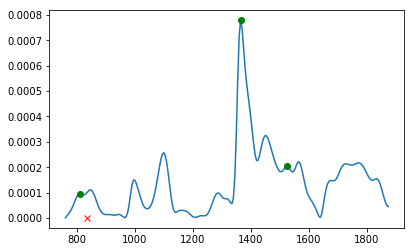

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(spectrum[:,0], spectrum[:,1])
plt.plot(8.10000000e+02, 9.56702061e-05, marker='o', color="green")
plt.plot(1.52500000e+03,   2.03047573e-04, marker='o', color="green")
plt.plot(1.36500000e+03,   7.78961636e-04, marker='o', color="green")
#from smoothed spectrum
plt.plot(835, 5.1662267651409791e-07, marker='x', color='red')



### Stuff that did not work very well

In [57]:
def SavGolSmooth(self):
    wavenumbers = self[:,0]
    intensity = self[:,1]
    smooth = sps.savgol_filter(intensity, 5, 1, deriv=1, delta=10)
    return smooth

In [71]:
smoothed = SavGolSmooth(spectrum)
smoothedindexes = peakutils.indexes(smoothed, thres=0.00008, min_dist=5)
smoothedpeaksdict={}
for index in smoothedindexes:
    smoothedpeaksdict[spectrum[index][0]] = spectrum[index][1]

In [73]:
smoothedpeaksdict
#not sure if im indexing incorrectly

{790.0: 5.8945821365341497e-05,
 835.0: 0.00010039583867183,
 905.0: 1.3629706700157801e-05,
 935.0: 1.19553560580243e-05,
 985.0: 9.5319701358675997e-05,
 1080.0: 0.00017045981076080401,
 1150.0: 2.7686472094501399e-05,
 1220.0: 6.4694845605117701e-06,
 1265.0: 5.1602120947791297e-05,
 1315.0: 7.5909054430667297e-05,
 1350.0: 0.00032814702717587401,
 1395.0: 0.00044489515130408097,
 1435.0: 0.00027184179634787099,
 1515.0: 0.00019287518807686901,
 1555.0: 0.000199853398953564,
 1610.0: 6.7524691985454397e-05,
 1655.0: 8.2995567936450202e-05,
 1705.0: 0.00017717345326673199,
 1760.0: 0.000211890961509198,
 1825.0: 0.00015017442638054501}